In [334]:
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
import sklearn.metrics as sm
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from itertools import combinations

In [335]:
feature_file = sys.path[1]+'/Data/data.csv'
target_file = sys.path[1]+'/Data/labels.csv'

with open(feature_file) as f:
    reader = csv.reader(f, delimiter=',', skipinitialspace=True)
    first_row = next(reader)
    num_cols = len(first_row)-1
    print('{} genes'.format(num_cols))
    

20531 genes


In [336]:
target=pd.read_csv(target_file, index_col=0)

In [337]:
features = pd.read_csv(feature_file, index_col=0)

In [338]:
features.head()
#transcripts per million

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [339]:
target['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [340]:
lb_make = LabelEncoder()
target_array = lb_make.fit_transform(target.values.reshape(-1,))
feature_array = np.array(features.values.tolist())

In [341]:
x_train, x_test, y_train, y_test = train_test_split(feature_array, target_array, test_size=0.25)

In [342]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [343]:
pca = PCA(n_components=min(len(features.columns),len(x_train)))
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=600, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'Cumulative % of Explained Variance')

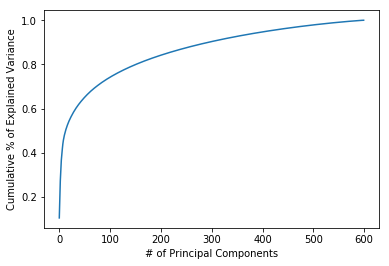

In [351]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative % of Explained Variance')

Text(0,0.5,'% of Explained Variance')

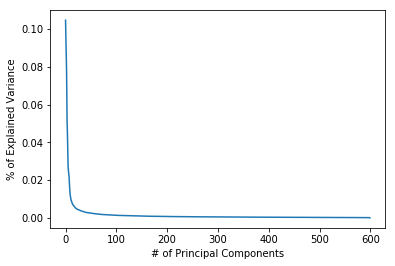

In [347]:
plt.plot(pca.explained_variance_ratio_)

In [304]:
len(pca.explained_variance_ratio_)

600

In [322]:
pca = PCA(n_components=3)
pca.fit(x_train_scaled)
xpca = pca.transform(x_train_scaled)

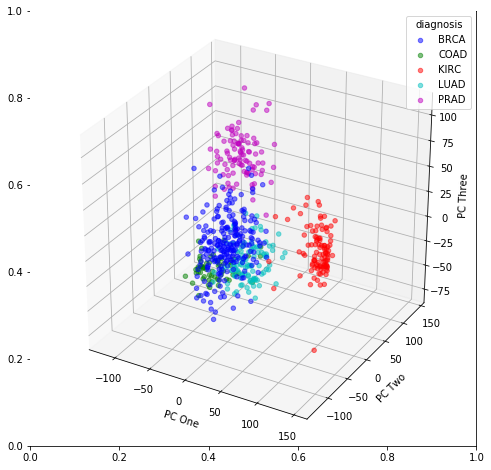

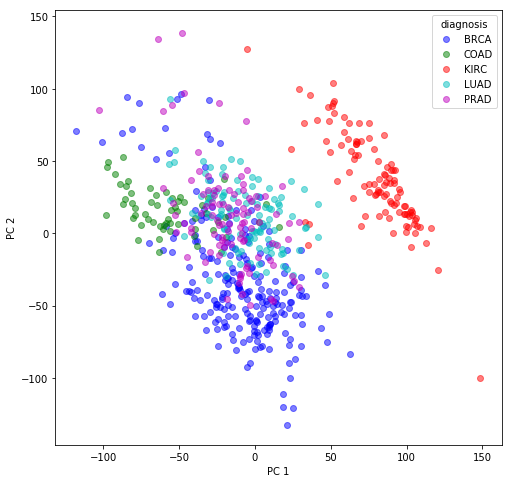

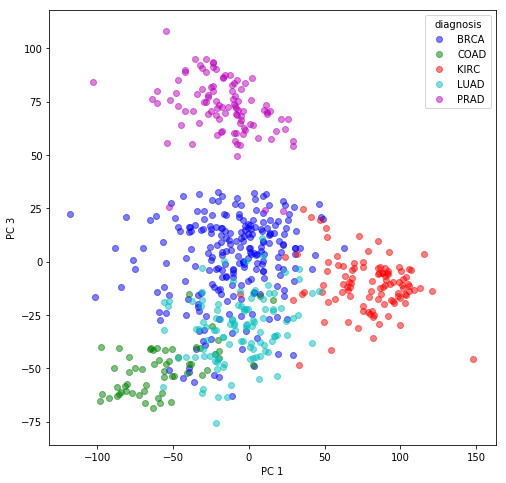

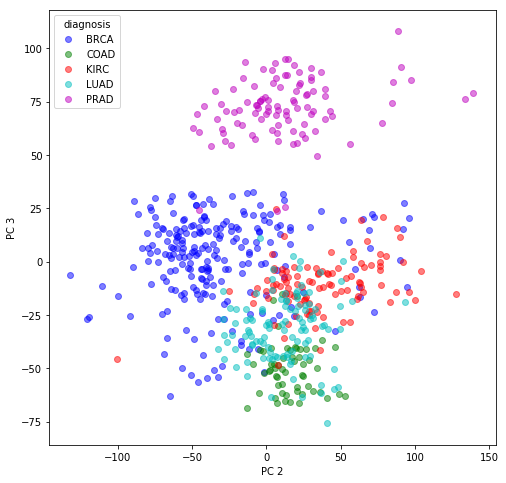

In [323]:
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = ['b','g','r','c','m']

for t in range(5):
  # Use a different color/marker for each class `t`
  c=colors[t]
  ax.scatter(xpca[:,0][y_train==t],xpca[:,1][y_train==t],xpca[:,2][y_train==t], c=c,alpha=.5)

ax.legend(lb_make.inverse_transform([0,1,2,3,4]), title = 'diagnosis')
ax.set_xlabel("PC One")
ax.set_ylabel("PC Two")
ax.set_zlabel("PC Three")

for plane in combinations(range(0,3),2):
    fig, ax = plt.subplots(figsize=(8,8))
    
    for t in range(5):
      # Use a different color/marker for each class `t`
      c=colors[t]
      ax.scatter(xpca[:,plane[0]][y_train==t],xpca[:,plane[1]][y_train==t], c=c,alpha=.5)

    ax.legend(lb_make.inverse_transform([0,1,2,3,4]), title = 'diagnosis')
    ax.set_xlabel("PC {}".format(plane[0]+1))
    ax.set_ylabel("PC {}".format(plane[1]+1))
    plt.show